#### Problem Statement
As part of Module 11, you are required to complete the project titled “Neural Network from Scratch”. This project is designed to test your understanding of fundamental neural network concepts by implementing a basic feedforward neural network using only NumPy, no external ML libraries like TensorFlow or PyTorch.
You will work with synthetic image data representing the characters A, B, and C using binary pixel patterns. Each image is a 5×6 (30-pixel) grid encoded as a 1D array. Your goal is to classify the input image as A, B, or C using a two-layer neural network trained via backpropagation.
________________________________________
#### What You Will Do
In this project, you will define pixel-based binary patterns for the letters A, B, and C, and use them as training data for your neural network. You will implement a feedforward neural network with a hidden layer, using the sigmoid activation function. The model will be trained using custom backpropagation logic, optimizing the weights to minimize classification error. Throughout training, you’ll track loss and accuracy across epochs and visualize them using matplotlib.
Once training is complete, you’ll test the model by predicting the correct class of the input letter and displaying its image using matplotlib.pyplot.imshow(). This project helps you gain hands-on experience with matrix operations, weight initialization, activation functions, loss computation, and gradient descent updates, which are essential building blocks of neural networks.


In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Define the binary pixel patterns for A, B, and C
letters = {
    "A": np.array([
        1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0
    ]),
    "B": np.array([
        1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1
    ]),
    "C": np.array([
        1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1
    ])
}

# Labels encoded as one-hot vectors
labels = {
    "A": np.array([1, 0, 0]),  # A -> [1, 0, 0]
    "B": np.array([0, 1, 0]),  # B -> [0, 1, 0]
    "C": np.array([0, 0, 1])   # C -> [0, 0, 1]
}

In [4]:
# Initialize Neural Network Parameters
# Neural network structure
input_size = 30
hidden_size = 10
output_size = 3

# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

In [5]:
# Define Activation Functions
# Using Sigmoid for hidden layer and Softmax for output:

def sigmoid(x):
    """Computes the sigmoid activation function """
    return 1 / (1 + np.exp(-x))

def softmax(x):
    """Computes the softmax activation function for multi-class classification """
    exp_x = np.exp(x - np.max(x))  # Stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [6]:
# Forward Propagation

def forward_pass(X):
    """Performs the forward pass through the neural network.
    
    Args:
        X (np.array): Input data matrix.
        
    Returns:
        tuple: Activations from hidden and output layers (A1, A2).
    """

    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    
    return A1, A2

In [7]:
# Compute loss

def cross_entropy_loss(y_pred, y_true):
    """Computes the cross-entropy loss for multi-class classification.
    
    Args:
        y_pred (np.array): Predicted probabilities.
        y_true (np.array): One-hot encoded true labels.
        
    Returns:
        float: Computed loss value.
    """

    return -np.sum(y_true * np.log(y_pred + 1e-8)) / len(y_true)

In [8]:
# Backpropagation

def backward_pass(X, A1, A2, y_true, learning_rate=0.1):
    """Performs backpropagation to update weights and biases.
    
    Args:
        X (np.array): Input data matrix.
        A1 (np.array): Hidden layer activations.
        A2 (np.array): Output layer activations.
        y_true (np.array): One-hot encoded true labels.
        learning_rate (float): Learning rate for weight updates.
    """

    global W1, W2, b1, b2

    # Output layer gradient
    dZ2 = A2 - y_true
    dW2 = np.dot(A1.T, dZ2) / len(y_true)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(y_true)
    
    # Hidden layer gradient
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 * (1 - A1))  # Sigmoid derivative
    dW1 = np.dot(X.T, dZ1) / len(y_true)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(y_true)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    

In [9]:
# Training loop

epochs = 1000
learning_rate = 0.1
losses = []

X_train = np.array(list(letters.values()))
y_train = np.array(list(labels.values()))

for epoch in range(epochs):
    A1, A2 = forward_pass(X_train)
    loss = cross_entropy_loss(A2, y_train)
    losses.append(loss)

    backward_pass(X_train, A1, A2, y_train, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")
        

Epoch 0: Loss = 1.0988
Epoch 100: Loss = 1.0817
Epoch 200: Loss = 0.6684
Epoch 300: Loss = 0.4896
Epoch 400: Loss = 0.3658
Epoch 500: Loss = 0.1831
Epoch 600: Loss = 0.0948
Epoch 700: Loss = 0.0590
Epoch 800: Loss = 0.0414
Epoch 900: Loss = 0.0313


In [10]:
# Model prediction

def predict(X):
    """Predicts the class label for a given input.
    
    Args:
        X (np.array): Input data matrix.
        
    Returns:
        np.array: Predicted class indices.
    """
    _, A2 = forward_pass(X)
    return np.argmax(A2, axis=1)
    

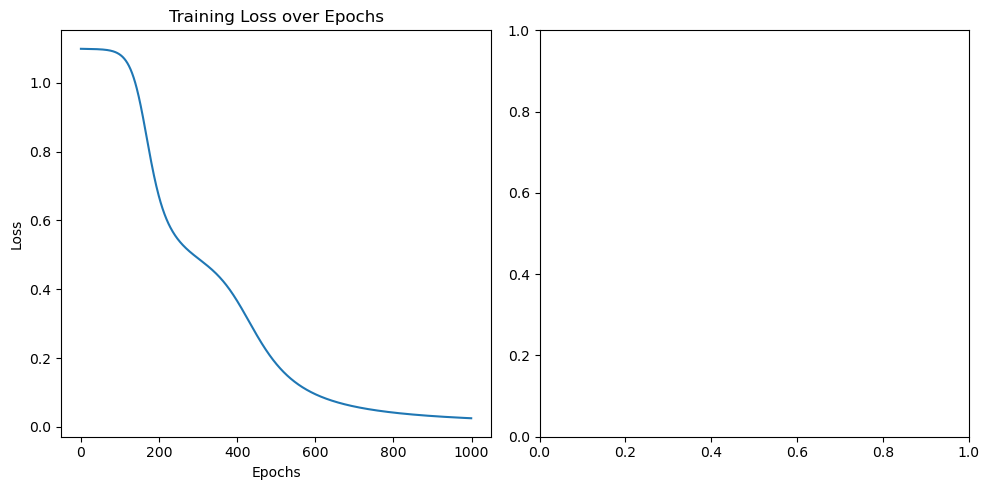

In [52]:
# Plot loss and letters
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot loss
axs[0].plot(losses)
axs[0].set_title("Training Loss over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
plt.tight_layout()
plt.show()



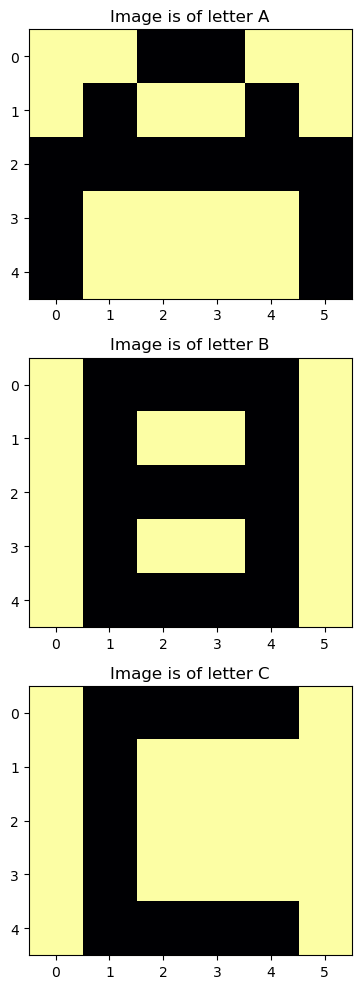

In [62]:
# Plot loss and letters
fig1, axs1 = plt.subplots(3, 1, figsize=(10, 10))
# Plot each letter
for i, letter in enumerate(["A", "B", "C"]):
    img = letters[letter].reshape(5, 6)
    axs1[i].imshow(img, cmap='inferno')
    prediction = predict(letters[letter].reshape(1, -1))[0]
    axs1[i].set_title(f"Image is of letter {letter}")

plt.tight_layout()
plt.show()